<a href="https://colab.research.google.com/github/nitishragu12/ImageClassification/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/owid-covid-data (1) (1).csv', delimiter=',', encoding="utf-8-sig")
# df = pd.read_csv('/content/owid-covid-data.csv', skiprows=[i for i in range(1,33385)], nrows = 439)
df

,Unnamed: 0,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2/24/2020,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2/27/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2/28/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79898,ZWE,Africa,Zimbabwe,4/8/2021,37052.0,68.0,22.286,1532.0,1.0,1.286,2492.914,4.575,1.499,103.075,0.067,0.087,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1841.0,451105.0,30.351,0.124,1639.0,0.110,0.014,73.5,tests performed,193677.0,166543.0,27134.0,14260.0,12624.0,1.30,1.12,0.18,849.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79899,ZWE,Africa,Zimbabwe,4/9/2021,37147.0,95.0,34.857,1535.0,3.0,1.571,2499.306,6.392,2.345,103.277,0.202,0.106,1.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2407.0,453512.0,30.513,0.162,1789.0,0.120,0.019,51.3,tests performed,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79900,ZWE,Africa,Zimbabwe,4/10/2021,37273.0,126.0,51.714,1538.0,3.0,2.000,2507.783,8.477,3.479,103.479,0.202,0.135,1.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2167.0,455679.0,30.659,0.146,1944.0,0.131,0.027,37.6,tests performed,222733.0,193936.0,28797.0,16528.0,12831.0,1.50,1.30,0.19,863.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.

In [ ]:
df = df.rename(columns={'date': 'ds', 'total_cases': 'y'})
df.head

<bound method NDFrame.head of       Unnamed: 0 continent  ... life_expectancy human_development_index
0            AFG      Asia  ...           64.83                   0.511
1            AFG      Asia  ...           64.83                   0.511
2            AFG      Asia  ...           64.83                   0.511
3            AFG      Asia  ...           64.83                   0.511
4            AFG      Asia  ...           64.83                   0.511
...          ...       ...  ...             ...                     ...
79898        ZWE    Africa  ...           61.49                   0.571
79899        ZWE    Africa  ...           61.49                   0.571
79900        ZWE    Africa  ...           61.49                   0.571
79901        ZWE    Africa  ...           61.49                   0.571
79902        ZWE    Africa  ...           61.49                   0.571

[79903 rows x 59 columns]>

In [ ]:
df_new = df.loc[df['location'] == 'India']
df_new

,Unnamed: 0,continent,location,ds,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32512,IND,Asia,India,1/30/2020,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32513,IND,Asia,India,1/31/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32514,IND,Asia,India,2/1/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32515,IND,Asia,India,2/2/2020,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32516,IND,Asia,India,2/3/2020,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32946,IND,Asia,India,4/8/2021,13060542.0,131968.0,108201.571,167642.0,780.0,606.571,9464.131,95.629,78.407,121.479,0.565,0.440,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1237781.0,252677379.0,183.099,0.897,1125537.0,0.816,0.096,10.4,samples tested,94334262.0,82456522.0,11877740.0,4135589.0,3649303.0,6.84,5.98,0.86,2644.0,69.91,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32947,IND,Asia,India,4/9/2021,13205926.0,145384.0,116238.000,168436.0,794.0,618.000,9569.481,105.350,84.230,122.055,0.575,0.448,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1364205.0,254041584.0,184.088,0.989,1161285.0,0.842,0.100,10.0,samples tested,98075160.0,85763852.0,12311308.0,3740898.0,3574409.0,7.11,6.21,0.89,2590.0,69.91,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32948,IND,Asia,India,4/10/2021,13358805.0,152879.0,124756.571,169275.0,839.0,664.571,9680.263,110.782,90.403,122.663,0.608,0.482,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1173219.0,255214803.0,184.938,0.850,1179373.0,0.855,0.106,9.5,samples tested,101595147.0,88885961.0,12709186.0,3519987.0,3659357.0,7

In [ ]:
df_new = df.loc[df['location'] == 'India'][['ds','y']]
df_new

,ds,y
32512,1/30/2020,1.0
32513,1/31/2020,1.0
32514,2/1/2020,1.0
32515,2/2/2020,2.0
32516,2/3/2020,3.0
...,...,...
32946,4/8/2021,13060542.0
32947,4/9/2021,13205926.0
32948,4/10/2021,13358805.0
32949,4/11/2021,13527717.0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 32512 to 32950
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      439 non-null    object 
 1   y       439 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.3+ KB


In [ ]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 32512 to 32950
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      439 non-null    datetime64[ns]
 1   y       439 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.3 KB


In [ ]:
df_new.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df_new.dropna()
df_new

,ds,y
32512,2020-01-30,1
32513,2020-01-31,1
32514,2020-02-01,1
32515,2020-02-02,2
32516,2020-02-03,3
...,...,...
32946,2021-04-08,13060542
32947,2021-04-09,13205926
32948,2021-04-10,13358805
32949,2021-04-11,13527717


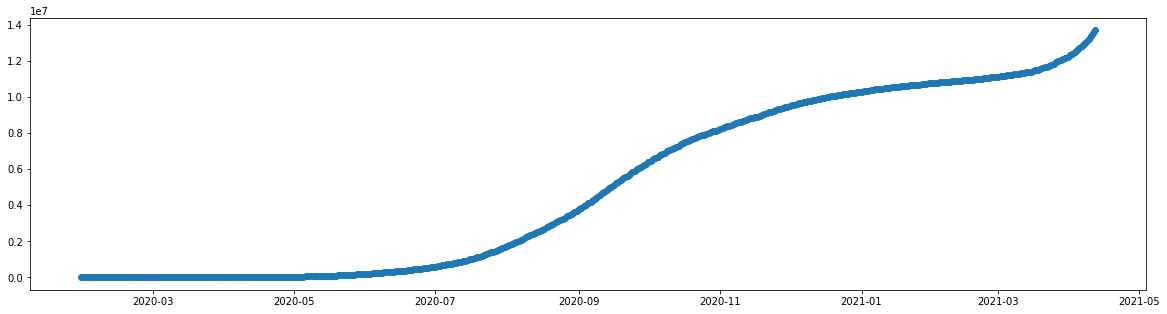

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet(changepoint_prior_scale=1)
model.fit(df_new)
forecast = model.make_future_dataframe(periods=30,freq='D')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-401.885398,-196070.655158,169564.618648,-401.885398,-401.885398,-3433.894733,-3433.894733,-3433.894733,-3433.894733,-3433.894733,-3433.894733,0.0,0.0,0.0,-3835.780131
1,2020-01-31,-411.929392,-192132.934788,193616.683857,-411.929392,-411.929392,195.755025,195.755025,195.755025,195.755025,195.755025,195.755025,0.0,0.0,0.0,-216.174368
2,2020-02-01,-421.973387,-186613.210675,199401.522961,-421.973387,-421.973387,4877.843284,4877.843284,4877.843284,4877.843284,4877.843284,4877.843284,0.0,0.0,0.0,4455.869897
3,2020-02-02,-432.017382,-184336.292173,215007.761236,-432.017382,-432.017382,8222.982003,8222.982003,8222.982003,8222.982003,8222.982003,8222.982003,0.0,0.0,0.0,7790.964621
4,2020-02-03,-442.061376,-185111.356853,205690.198496,-442.061376,-442.061376,7766.096569,7766.096569,7766.096569,7766.096569,7766.096569,7766.096569,0.0,0.0,0.0,7324.035193


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,-3835.780131,-196070.655158,169564.618648
1,2020-01-31,-216.174368,-192132.934788,193616.683857
2,2020-02-01,4455.869897,-186613.210675,199401.522961
3,2020-02-02,7790.964621,-184336.292173,215007.761236
4,2020-02-03,7324.035193,-185111.356853,205690.198496


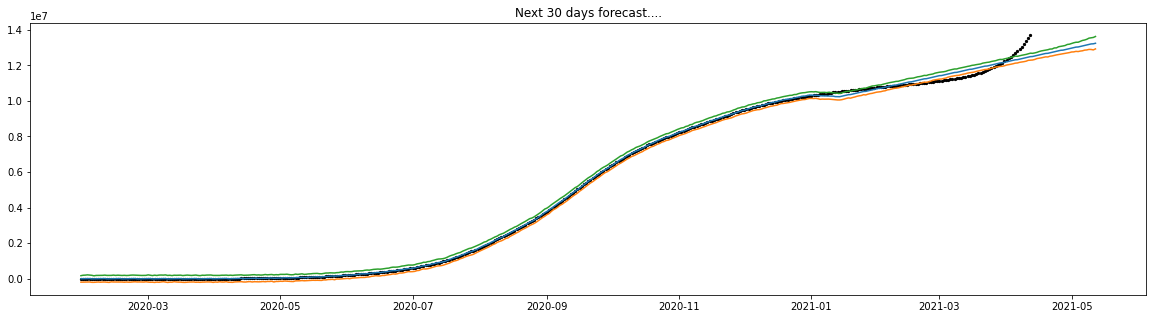

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.title('Next 30 days forecast....')
plt.show()

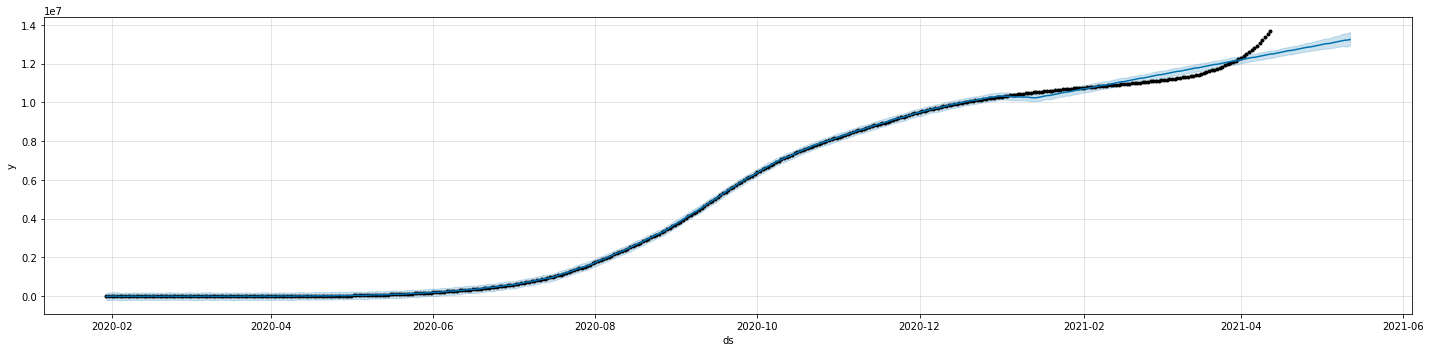

In [ ]:
model.plot(forecast,figsize=(20,5));